## An Exploration of UN data
In this project, you'll be doing some exploratory analysis on two country-level metrics, gross domestic product (GDP) per capita and overall life expectancy. After completing the guided practice section, you will have a chance to find some additional data and do some more exploring of your own.

### Guided Practice:
 1.	Download the Gross Domestic Product (GDP) per capita dataset from [http://data.un.org/Data.aspx?d=WDI&f=Indicator_Code%3aNY.GDP.PCAP.PP.KD](http://data.un.org/Data.aspx?d=WDI&f=Indicator_Code%3aNY.GDP.PCAP.PP.KD). Rename it to gdp_per_capita.csv and place it in the `data` folder of your project repository.

2. Create a Jupyter Notebook in the `notebooks` folder and name it `UN_Data_Exploration`.

(https://www.markdownguide.org/cheat-sheet/) is a link to a cheat sheet showing the basics of styling text using Markdown.

3.	In the first cell of your notebook, import the required packages with their customary aliases as follows:  

In [1]:
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt  
import seaborn as sns

4.	Using the pandas `read_csv()` function, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. After reading it in, inspect the first 10 rows and then inspect the last 10 rows. 

In [2]:
gdp_df = pd.read_csv("../data/UNdata_Export_20230915_035344035.csv")

In [3]:
gdp_df.head(10)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2020,1970.560169,NaN
1,Afghanistan,2019,2065.036235,NaN
2,Afghanistan,2018,2033.804389,NaN
3,Afghanistan,2017,2058.400221,NaN
4,Afghanistan,2016,2057.067978,NaN
5,Afghanistan,2015,2068.265904,NaN
6,Afghanistan,2014,2102.384604,NaN
7,Afghanistan,2013,2116.465258,NaN
8,Afghanistan,2012,2075.491614,NaN
9,Afghanistan,2011,1904.559926,NaN


In [4]:
gdp_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
7166,Zimbabwe,1999,2872.714795,NaN
7167,Zimbabwe,1998,2915.052992,NaN
7168,Zimbabwe,1997,2856.118188,NaN
7169,Zimbabwe,1996,2808.558556,NaN
7170,Zimbabwe,1995,2573.993785,NaN
7171,Zimbabwe,1994,2603.927369,NaN
7172,Zimbabwe,1993,2420.092791,NaN
7173,Zimbabwe,1992,2437.152908,NaN
7174,Zimbabwe,1991,2733.696626,NaN
7175,Zimbabwe,1990,2652.129209,NaN


In [5]:
gdp_df.describe

<bound method NDFrame.describe of      Country or Area  Year        Value  Value Footnotes
0        Afghanistan  2020  1970.560169              NaN
1        Afghanistan  2019  2065.036235              NaN
2        Afghanistan  2018  2033.804389              NaN
3        Afghanistan  2017  2058.400221              NaN
4        Afghanistan  2016  2057.067978              NaN
...              ...   ...          ...              ...
7171        Zimbabwe  1994  2603.927369              NaN
7172        Zimbabwe  1993  2420.092791              NaN
7173        Zimbabwe  1992  2437.152908              NaN
7174        Zimbabwe  1991  2733.696626              NaN
7175        Zimbabwe  1990  2652.129209              NaN

[7176 rows x 4 columns]>

5. Drop the 'Value Footnotes' column, and rename the remaining columns to 'Country', 'Year', and 'GDP_Per_Capita'.

In [6]:
gdp_df = gdp_df.drop(columns=['Value Footnotes'])

In [7]:
gdp_df.columns =["Country", "Year", "GDP_Per_Capita"]
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
1,Afghanistan,2019,2065.036235
2,Afghanistan,2018,2033.804389
3,Afghanistan,2017,2058.400221
4,Afghanistan,2016,2057.067978


6. How many rows and columns does gdp_df have? What are the data types of its columns? If any of the columns are not the expected types, figure out why and fix it.

In [8]:
gdp_df.shape

(7176, 3)

In [9]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7176 entries, 0 to 7175
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         7176 non-null   object 
 1   Year            7176 non-null   int64  
 2   GDP_Per_Capita  7176 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 168.3+ KB


In [10]:
gdp_df.head(2)

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
1,Afghanistan,2019,2065.036235


7. Which years are represented in this dataset? Take a look at the number of observations per year. What do you notice?

In [11]:
gdp_df["Year"].min()

1990

In [12]:
gdp_df["Year"].max()

2020

(array([206., 207., 208., 209., 211., 222., 222., 226., 226., 227., 233.,
        234., 235., 235., 236., 236., 237., 237., 238., 239., 239., 240.,
        240., 242., 242., 242., 242., 242., 242., 481.]),
 array([1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997., 1998.,
        1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006., 2007.,
        2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015., 2016.,
        2017., 2018., 2019., 2020.]),
 <BarContainer object of 30 artists>)

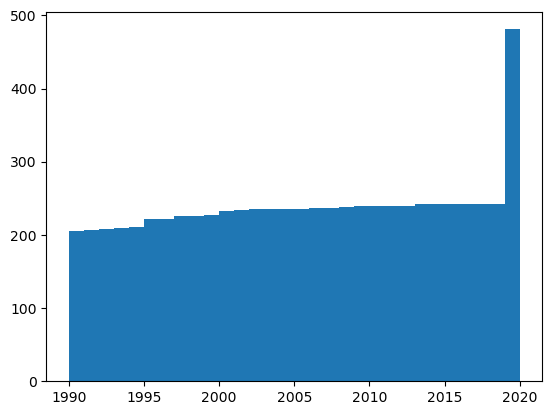

In [13]:
plt.hist(gdp_df["Year"], bins=30)

8. How many countries are represented in this dataset? Which countries are least represented in the dataset? Why do you think these countries have so few observations?

In [14]:
gdp_df.nunique()

Country            242
Year                31
GDP_Per_Capita    7120
dtype: int64

In [15]:
gdp_df.value_counts(["Country"], sort=True)

Country                                           
Least developed countries: UN classification          31
Niger                                                 31
Middle East & North Africa (excluding high income)    31
Middle income                                         31
Mongolia                                              31
                                                      ..
Kosovo                                                13
Turks and Caicos Islands                              10
Sint Maarten (Dutch part)                             10
Somalia                                                8
Djibouti                                               8
Length: 242, dtype: int64

Least represented countries experienced some form of upheaval... civil war, natural disaster, etc

9. Create a new dataframe by subsetting `gdp_df` to just the year 2014. Call this new dataframe `gdp_2014`.

In [16]:
gdp_2014=gdp_df[gdp_df["Year"]==2014]
gdp_2014.head()

,Country,Year,GDP_Per_Capita
6,Afghanistan,2014,2102.384604
25,Africa Eastern and Southern,2014,3677.319414
56,Africa Western and Central,2014,4215.646000
87,Albania,2014,11586.833878
118,Algeria,2014,11512.690472


10. Use `.describe()` to find the summary statistics for GDP per capita in 2014. 

In [17]:
gdp_2014.describe()

,Year,GDP_Per_Capita
count,242.0,242.000000
mean,2014.0,19612.875611
std,0.0,20961.714572
min,2014.0,822.611195
25%,2014.0,4702.212961
50%,2014.0,12178.874687
75%,2014.0,26461.384188
max,2014.0,155201.740571


11. Create a histogram of GDP Per Capita numbers for 2014 (you may wish to adjust the number of bins for your histogram). How would you describe the shape of the distribution?

(array([82., 43., 36., 16., 13., 12.,  9., 10.,  7.,  6.,  3.,  0.,  1.,
         0.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([   822.61119489,   6997.77636993,  13172.94154497,  19348.10672001,
         25523.27189505,  31698.43707008,  37873.60224512,  44048.76742016,
         50223.9325952 ,  56399.09777024,  62574.26294527,  68749.42812031,
         74924.59329535,  81099.75847039,  87274.92364543,  93450.08882046,
         99625.2539955 , 105800.41917054, 111975.58434558, 118150.74952062,
        124325.91469565, 130501.07987069, 136676.24504573, 142851.41022077,
        149026.57539581, 155201.74057084]),
 <BarContainer object of 25 artists>)

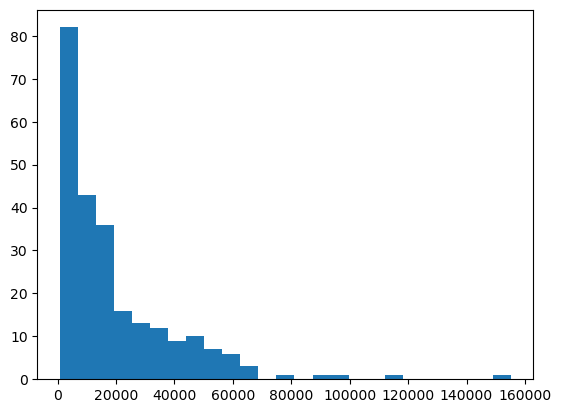

In [19]:
plt.hist(gdp_2014["GDP_Per_Capita"], bins=25)

Distribution is skewed to the right

12. Find the top 5 counties and bottom 5 countries by GDP per capita in 2018.

In [20]:
gdp_2018=gdp_df[gdp_df["Year"]==2018]

In [22]:
gdp_2018.sort_values("GDP_Per_Capita", ascending=False)

,Country,Year,GDP_Per_Capita
3915,"Macao SAR, China",2018,132373.544079
3884,Luxembourg,2018,115049.926079
5722,Singapore,2018,98336.956494
5383,Qatar,2018,90970.060902
3073,Ireland,2018,83726.362961
...,...,...,...
4752,Niger,2018,1200.402348
5873,Somalia,2018,1129.531464
1526,Dem. Rep. Congo,2018,1085.893688
1138,Central African Republic,2018,933.109951


In [23]:
gdp_2018.sort_values("GDP_Per_Capita")

,Country,Year,GDP_Per_Capita
916,Burundi,2018,761.524143
1138,Central African Republic,2018,933.109951
1526,Dem. Rep. Congo,2018,1085.893688
5873,Somalia,2018,1129.531464
4752,Niger,2018,1200.402348
...,...,...,...
3073,Ireland,2018,83726.362961
5383,Qatar,2018,90970.060902
5722,Singapore,2018,98336.956494
3884,Luxembourg,2018,115049.926079


13. Now, return to the full dataset, `gdp_df`. Pivot the data for 1990 and 2018 (using the pandas `.pivot_table()` method or another method) so that each row corresponds to a country, each column corresponds to a year, and the values in the table give the GDP_Per_Capita amount. Drop any rows that are missing values for either 1990 or 2018. Save the result to a dataframe named `gdp_pivoted`.

In [27]:
gdp_pivoted = pd.pivot_table(gdp_df,
                             index="Country",
                             columns="Year",
                            values="GDP_Per_Capita")
gdp_pivoted.head(2)

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1904.559926,2075.491614,2116.465258,2102.384604,2068.265904,2057.067978,2058.400221,2033.804389,2065.036235,1970.560169
Africa Eastern and Southern,3083.9768,2998.435307,2858.935715,2768.082812,2741.742703,2788.86851,2864.243325,2910.470139,2888.955036,2892.680734,...,3589.316287,3576.560302,3626.792156,3677.319414,3694.915103,3691.284532,3694.912741,3697.317275,3684.315172,3491.978104


In [28]:
gdp_pivoted.columns

Int64Index([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
            2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
            2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
           dtype='int64', name='Year')

In [32]:
gdp_pivoted = gdp_pivoted.dropna(subset=[1990, 2018])
gdp_pivoted.head(2)

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country,,,,,,,,,,,,,,,,,,,,,
Africa Eastern and Southern,3083.976800,2998.435307,2858.935715,2768.082812,2741.742703,2788.868510,2864.243325,2910.470139,2888.955036,2892.680734,...,3589.316287,3576.560302,3626.792156,3677.319414,3694.915103,3691.284532,3694.912741,3697.317275,3684.315172,3491.978104
Africa Western and Central,2810.341129,2770.672791,2764.956399,2664.878345,2593.404383,2579.822162,2630.296470,2672.029674,2694.491443,2667.157700,...,3872.809121,3966.071234,4092.768630,4215.646000,4216.409204,4121.249120,4115.645480,4132.592996,4159.844650,4021.293919


In [44]:
gdp_pivoted.shape

(206, 32)

14. Create a new column in `gdp_pivoted` named `Percent_Change`. This column should contain the percent change in GDP_Per_Capita from 1990 to 2018. Hint: Percent change is calculated as 100*(New Value - Old Value) / Old Value.

In [40]:
gdp_pivoted["Percent_Change"]=100*(gdp_pivoted[2018]-gdp_pivoted[1990])/gdp_pivoted[1990]
gdp_pivoted.head(2)

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Percent_Change
Country,,,,,,,,,,,,,,,,,,,,,
Africa Eastern and Southern,3083.976800,2998.435307,2858.935715,2768.082812,2741.742703,2788.868510,2864.243325,2910.470139,2888.955036,2892.680734,...,3576.560302,3626.792156,3677.319414,3694.915103,3691.284532,3694.912741,3697.317275,3684.315172,3491.978104,19.887973
Africa Western and Central,2810.341129,2770.672791,2764.956399,2664.878345,2593.404383,2579.822162,2630.296470,2672.029674,2694.491443,2667.157700,...,3966.071234,4092.768630,4215.646000,4216.409204,4121.249120,4115.645480,4132.592996,4159.844650,4021.293919,47.049515


15. How many countries experienced a negative percent change in GDP per capita from 1990 to 2018?

In [43]:
gdp_pivoted[gdp_pivoted["Percent_Change"]]<0

KeyError: "None of [Float64Index([ 19.88797306622864,  47.04951487942708,  175.8855809567071,\n               32.97766146387124, 21.239615364116702, 35.957575307835675,\n                49.0530120954388,  60.81740344505344, 145.46252364672264,\n              20.305421475521463,\n              ...\n               50.08768885575725,  51.64061664894598,  180.7521703504467,\n              108.15845966092223,  94.64592521720691,   8.31824652449444,\n               362.0997101547521,  71.86982876279168, 60.787844218957154,\n              -5.844081436353487],\n             dtype='float64', name='Year', length=206)] are in the [columns]"

16. Which country had the highest % change in GDP per capita? Create a line plot showing this country's GDP per capita for all years from 1990 to 2018. Create another showing the country with the second highest % change in GDP. How do the trends in these countries compare?  
**Bonus:** Put both line charts on the same plot.

17. Read in continents.csv contained in the `data` folder into a new dataframe called `continents`. We will be using this dataframe to add a new column to our dataset.

18. Merge gdp_df and continents. Keep only the countries that appear in both data frames. Save the result back to gdp_df.

19. Determine the number of countries per continent. Create a bar chart showing this.

20. Create a seaborn boxplot showing GDP per capita in 2018 split out by continent. What do you notice?

21. Download the full csv containing Life expectancy at birth, total (years) from [https://data.worldbank.org/indicator/SP.DYN.LE00.IN?name_desc=false](https://data.worldbank.org/indicator/SP.DYN.LE00.IN?name_desc=false). Read this data into a DataFrame named `life_expectancy`. Note: When reading this dataset it, you may encounter an error. Modify your `read_csv` call to correc this without modifying the original csv file.
 

22. Drop the Country Code, Indicator Name, and Indicator Code columns. Then use [`.melt()`](https://pandas.pydata.org/docs/reference/api/pandas.melt.html) to convert your data from wide to long. That is, instead of having one row per country and multiple colums per year, we want to have multiple rows per country and a single column for year. After melting, rename the columns to `Country`, `Year`, and `Life_Expectancy`.

23. What was the first country with a life expectancy to exceed 80?

24. Merge `gdp_df` and `life_expectancy`, keeping all countries and years that appear in both DataFrames. Save the result to a new DataFrame named `gdp_le`. If you get any errors in doing this, read them carefully and correct them. Look at the first five rows of your new data frame to confirm it merged correctly. Also, check the last five rows to make sure the data is clean and as expected.

25. Create a new DataFrame, named `gdp_le_2019` by extracting data for the year 2019 from `gdp_le`. How many countries have a life expectancy of at least 80 in 2019?

26. Find the countries that had the top 3 largest GDP per capita figures for 2019. Create a [seaborn FacetGrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) showing the change in life expectancy over time for these three countries. Each individual figure in the facet grid will represent a single country.

27. Create a scatter plot of Life Expectancy vs GDP per Capita for the year 2019. What do you notice?

28. Find the correlation between Life Expectancy and GDP per Capita for the year 2019. What is the meaning of this number?

29. Add a column to `gdp_le_2019` and calculate the logarithm of GDP per capita. Find the correlation between the log of GDP per capita and life expectancy. How does this compare to the calculation in the previous part? Look at a scatter plot to see if the result of this calculation makes sense.

### Solo Exploration and Presentation:
1. Choose and download another data set from the UN data [http://data.un.org/Explorer.aspx](http://data.un.org/Explorer.aspx) to explore. You may want to combine your new dataset with one or both of the datasets that you already worked with. Prepare a short (< 5 minute) presentation of your findings. Report any interesting correlations or trends that you find. 
2.    If time allows, check out the plotly library to add additional interativity to your plots. [https://plotly.com/python/plotly-express/](https://plotly.com/python/plotly-express/).